In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-02,91.962502,92.617500,90.910004,91.027496,90.418251,114041600
1,2020-07-06,92.500000,93.945000,92.467499,93.462502,92.836960,118655600
2,2020-07-07,93.852501,94.654999,93.057503,93.172501,92.548889,112424400
3,2020-07-08,94.180000,95.375000,94.089996,95.342499,94.704369,117092000
4,2020-07-09,96.262497,96.317497,94.672501,95.752502,95.111641,125642800


In [32]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-06-28,133.410004,135.250000,133.350006,134.779999,134.779999,62063700
249,2021-06-29,134.800003,136.490005,134.350006,136.330002,136.330002,64556100
250,2021-06-30,136.169998,137.410004,135.869995,136.960007,136.960007,63261400
251,2021-07-01,136.600006,137.330002,135.759995,137.270004,137.270004,52433300
252,2021-07-02,137.899994,139.809998,137.744995,139.744995,139.744995,51758947


In [3]:
#overview of the data
df.shape

(253, 7)

So our dataset has 253 rows and 7 columns

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].head(2)

0   2020-07-02
1   2020-07-06
Name: Date, dtype: datetime64[ns]

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,122.039259,123.467738,120.415741,121.976482,121.615627,1.195321e+08
std,11.151427,11.080783,11.064307,11.086283,11.215557,5.342286e+07
min,90.987503,92.617500,89.144997,91.027496,90.418251,4.669130e+07
25%,115.982498,117.279999,114.129997,115.750000,115.182587,8.400090e+07
50%,123.750000,125.180000,122.209999,123.750000,123.540001,1.051582e+08
75%,129.800003,131.449997,128.500000,130.360001,130.210007,1.447120e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,3.743368e+08


THe highest opening price was 145 while the minimum is 92

THe highest closing price was 143 while the minimum is 90

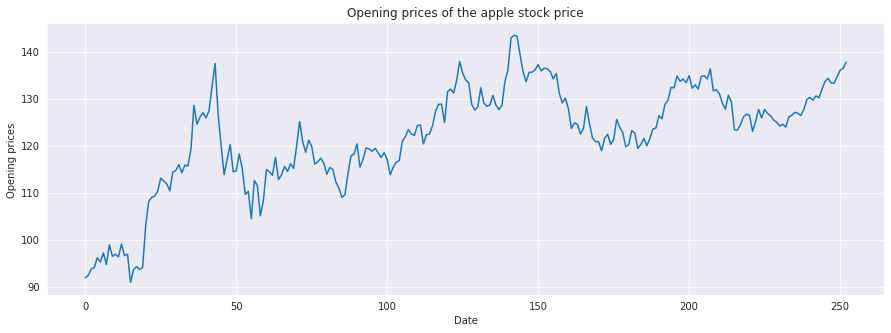

In [14]:
#visulazations of opening price
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df['Open'])
plt.title("Opening prices of the apple stock price")
plt.xlabel("Date")
plt.ylabel('Opening prices ')
plt.show()

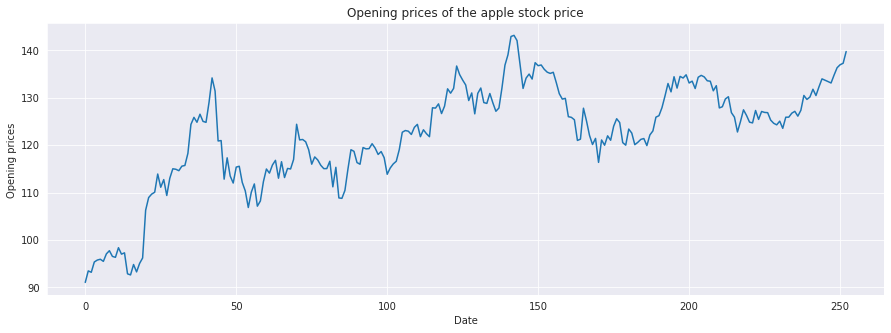

In [15]:
#visulazations of closing price
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df['Close'])
plt.title("Opening prices of the apple stock price")
plt.xlabel("Date")
plt.ylabel('Opening prices ')
plt.show()

The trend of closing and opening price of apple stock is almost the same

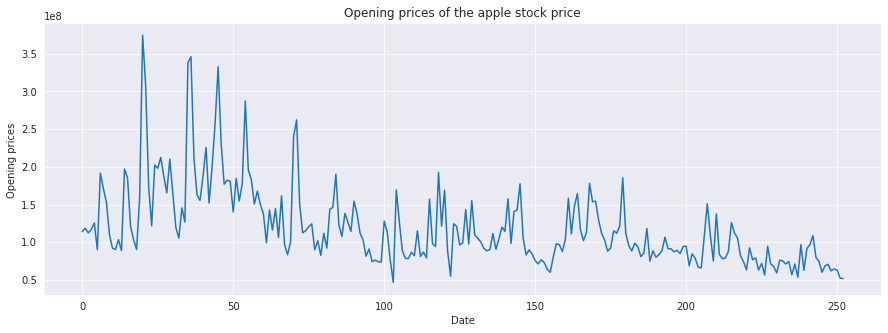

In [18]:
# visulazations of volume
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df['Volume'])
plt.title("Opening prices of the apple stock price")
plt.xlabel("Date")
plt.ylabel('Opening prices ')
plt.show()

This is very interesting the stock price seem to be increaing  but the volume of apple stock seem to be increasing

In [25]:
#to get the closing price it  column we will use for  prediction
apple=df[['Close']]
apple.head(4)

,Close
0,91.027496
1,93.462502
2,93.172501
3,95.342499


In [26]:
#varaible for future days
futuredays=30

In [30]:
#creating a new target column with shifted
apple["Prediction"] = apple[["Close"]].shift(-futuredays)
apple.head()

,Close,Prediction
0,91.027496,114.907501
1,93.462502,114.607498
2,93.172501,115.562500
3,95.342499,115.707497
4,95.752502,118.275002


In [31]:
apple.tail()

,Close,Prediction
248,134.779999,NaN
249,136.330002,NaN
250,136.960007,NaN
251,137.270004,NaN
252,139.744995,NaN


In [35]:
#creating the dataset and dropping the last one
x=np.array(apple.drop(['Prediction'],1))[:-futuredays]


In [37]:
#target dataset
y=np.array(apple['Prediction'])[:-futuredays]
y

array([114.907501, 114.607498, 115.5625  , 115.707497, 118.275002,
       124.370003, 125.857498, 124.824997, 126.522499, 125.010002,
       124.807503, 129.039993, 134.179993, 131.399994, 120.879997,
       120.959999, 112.82    , 117.32    , 113.489998, 112.      ,
       115.360001, 115.540001, 112.129997, 110.339996, 106.839996,
       110.080002, 111.809998, 107.120003, 108.220001, 112.279999,
       114.959999, 114.089996, 115.809998, 116.790001, 113.019997,
       116.5     , 113.160004, 115.080002, 114.970001, 116.970001,
       124.400002, 121.099998, 121.190002, 120.709999, 119.019997,
       115.980003, 117.510002, 116.870003, 115.75    , 115.040001,
       115.050003, 116.599998, 111.199997, 115.32    , 108.860001,
       108.769997, 110.440002, 114.949997, 119.029999, 118.690002,
       116.32    , 115.970001, 119.489998, 119.209999, 119.260002,
       120.300003, 119.389999, 118.029999, 118.639999, 117.339996,
       113.849998, 115.169998, 116.029999, 116.589996, 119.050

In [38]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [40]:
#creating a decion tree
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
#getting the last rows of the features
xfuture=apple.drop(['Prediction'],1)[:-futuredays]
xfuture=xfuture.tail(futuredays)
xfuture=np.array(xfuture)
xfuture

array([[133.      ],
       [131.240005],
       [134.429993],
       [132.029999],
       [134.5     ],
       [134.160004],
       [134.839996],
       [133.110001],
       [133.5     ],
       [131.940002],
       [134.320007],
       [134.720001],
       [134.389999],
       [133.580002],
       [133.479996],
       [131.460007],
       [132.539993],
       [127.849998],
       [128.100006],
       [129.740005],
       [130.210007],
       [126.849998],
       [125.910004],
       [122.769997],
       [124.970001],
       [127.449997],
       [126.269997],
       [124.849998],
       [124.690002],
       [127.309998]])

In [45]:
#decion tree model
treePrediction=tree.predict(xfuture)
print('Tree predictions:',treePrediction)

Tree predictions: [125.43     127.099998 126.900002 126.849998 125.279999 124.610001
 126.739998 125.059998 123.540001 125.889999 125.900002 126.739998
 127.129997 126.110001 127.349998 120.709999 125.43     130.149994
 131.789993 130.460007 132.300003 133.979996 126.269997 128.910004
 133.110001 139.744995 136.330002 136.960007 133.479996 139.744995]


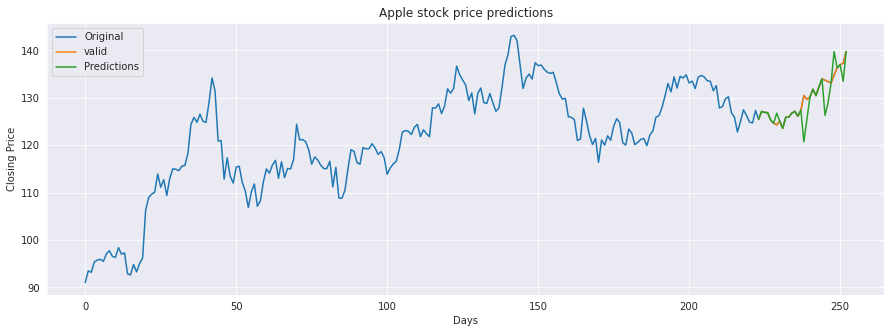

In [52]:
#visualizations
prediction=treePrediction
valid=apple[x.shape[0]:]
valid['Predictions']=prediction
plt.figure(figsize=(15,5))
plt.title("Apple stock price predictions")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(apple['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','valid','Predictions'])
plt.show()

In [53]:
#linear model
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#prediction using linear
linearPrediction=linear.predict(xfuture)
print('linearpredictions:',linearPrediction)

linearpredictions: [127.63783507 127.28819905 127.92191374 127.4451372  127.93582115
 127.86827843 128.00336387 127.65968758 127.73716376 127.42725863
 127.90006421 127.97952598 127.91396864 127.75305675 127.73318982
 127.33190407 127.54645128 126.61474911 126.66441504 126.99021297
 127.08358234 126.41609172 126.22935496 125.60556936 126.04261642
 126.53528595 126.30087023 126.01877693 125.98699255 126.50747412]


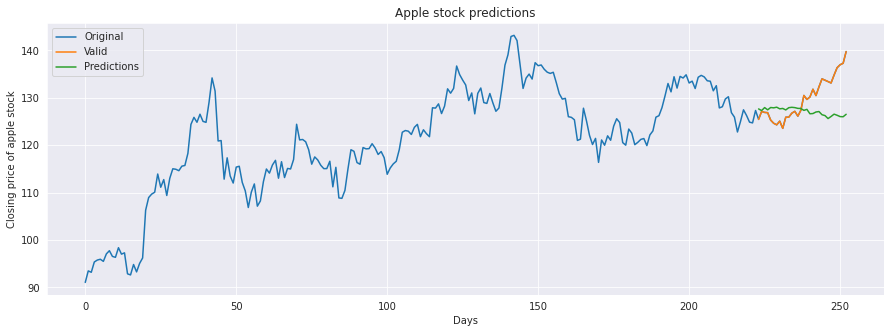

In [59]:
#visualizations
close=linearPrediction
valid=apple[x.shape[0]:]
valid['Predictions']=close
plt.figure(figsize=(15,5))
plt.title('Apple stock predictions')
plt.xlabel('Days')
plt.ylabel('Closing price of apple stock')
plt.plot(apple['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Valid','Predictions'])
plt.show()

This model totally sucks it predict a drop in price but in reality it will increase